# Revelando os dados wiki4HE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas_profiling import ProfileReport

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'


# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

## Verificando Dataset

Questo set di dati contiene dati sui professori di alcune università sull'uso di Wikipedia come risorsa didattica. I dati forniti contengono dati demografici sugli insegnanti che hanno partecipato al questionario e diverse domande a cui è stata data risposta sulla scala Likert, dove 1 rappresenta "totalmente in disaccordo / mai" e 5 rappresenta "totalmente d'accordo / sempre".

In [2]:
df = pd.read_csv('dataset/uci - missing data/wiki4HE/wiki4HE.csv', sep=';')
df.head()

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,2,?,?,0,...,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,2,?,?,0,...,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,3,?,?,0,...,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,3,?,?,0,...,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,3,?,?,1,...,5,5,5,4,4,5,5,5,4,4


Per analizzare meglio i dati, è interessante dividerli in due dataset, uno per i dati demografici e uno per le domande.

In [3]:
perguntas = df.iloc[:, 10:]
professores = df.iloc[:, :10]

In [4]:
professores

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI
0,40,0,2,1,14,1,2,?,?,0
1,42,0,5,1,18,1,2,?,?,0
2,37,0,4,1,13,1,3,?,?,0
3,40,0,4,0,13,1,3,?,?,0
4,51,0,6,0,8,1,3,?,?,1
...,...,...,...,...,...,...,...,...,...,...
908,43,0,5,1,21,2,?,?,2,0
909,53,0,6,0,25,2,?,?,6,0
910,39,0,5,1,9,2,?,?,4,0
911,40,0,3,1,10,2,?,?,2,0


Cambiamo il "?" da NaN (Not a Number) che è un formato standard per i dati mancanti o nulli. Da questa trasformazione è possibile identificare il volume di dati nulli presenti nel dataset. Quindi verrà eseguito anche con i dati completi.

In [5]:
professores.replace('?', np.nan, inplace=True)
perguntas.replace('?', np.nan, inplace=True)

In [6]:
professores.isna().sum()

AGE                 0
GENDER              0
DOMAIN              2
PhD                 0
YEARSEXP           23
UNIVERSITY          0
UOC_POSITION      113
OTHER_POSITION    261
OTHERSTATUS       540
USERWIKI            4
dtype: int64

Come possiamo notare, diverse colonne presentano Come possiamo vedere, diverse colonne hanno valori mancanti. Da allora, le colonne "UOC_POSITION", "OTHER_POSITION" e "ALTRO STATO" hanno il maggior numero di casi di valori mancanti. Questo è comprensibile, dato che questi campi non sono sempre obbligatori e non forniscono così tante informazioni come altri dati demografici. Quindi rimuoveremo queste colonne dalla nostra analisi. mancante. Per cui le colonne "UOC_POSITION", "OTHER_POSITION e "ALTRO STATO" hanno il maggior numero di casi di valori mancanti. Questo è comprensibile, dato che questi campi non sono sempre obbligatori e non forniscono così tante informazioni come altri dati demografici. Quindi elimineremo queste colonne dalla nostra analisi.

In [7]:
professores.drop(columns=['UOC_POSITION', 'OTHER_POSITION', 'OTHERSTATUS'], inplace=True)

In [8]:
professores.isna().sum()

AGE            0
GENDER         0
DOMAIN         2
PhD            0
YEARSEXP      23
UNIVERSITY     0
USERWIKI       4
dtype: int64

Poiché sono rimaste poche righe di dati con un valore nullo, è interessante rimuovere queste righe per procedere con l'analisi.

In [9]:
professores.dropna(inplace=True)
professores.reset_index(drop=True)

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,USERWIKI
0,40,0,2,1,14,1,0
1,42,0,5,1,18,1,0
2,37,0,4,1,13,1,0
3,40,0,4,0,13,1,0
4,51,0,6,0,8,1,1
...,...,...,...,...,...,...,...
880,43,0,5,1,21,2,0
881,53,0,6,0,25,2,0
882,39,0,5,1,9,2,0
883,40,0,3,1,10,2,0


In [10]:
professores.isna().sum()

AGE           0
GENDER        0
DOMAIN        0
PhD           0
YEARSEXP      0
UNIVERSITY    0
USERWIKI      0
dtype: int64

Metteremo l'età e gli anni di esperienza sulla stessa scala utilizzando MinMaxScaler che normalizza i dati continui a un valore compreso tra 0 e 1. Prima di ciò, sarà necessario modificare la colonna YEAREXP in una colonna continua e non più categoriale.

In [11]:
professores.YEARSEXP = professores.YEARSEXP.astype(int)

In [12]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['YEARSEXP', 'AGE']

professores_transform = pd.DataFrame(data = professores)
professores_transform[numerical] = scaler.fit_transform(professores[numerical])

professores_transform = pd.DataFrame(data = professores_transform, columns=professores.columns)
# Show an example of a record with scaling applied
display(professores_transform.head())

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,USERWIKI
0,0.369565,0,2,1,0.325581,1,0
1,0.413043,0,5,1,0.418605,1,0
2,0.304348,0,4,1,0.302326,1,0
3,0.369565,0,4,0,0.302326,1,0
4,0.608696,0,6,0,0.186047,1,1


Scopriremo la proporzione tra uomini e donne, in relazione agli insegnanti intervistati.

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


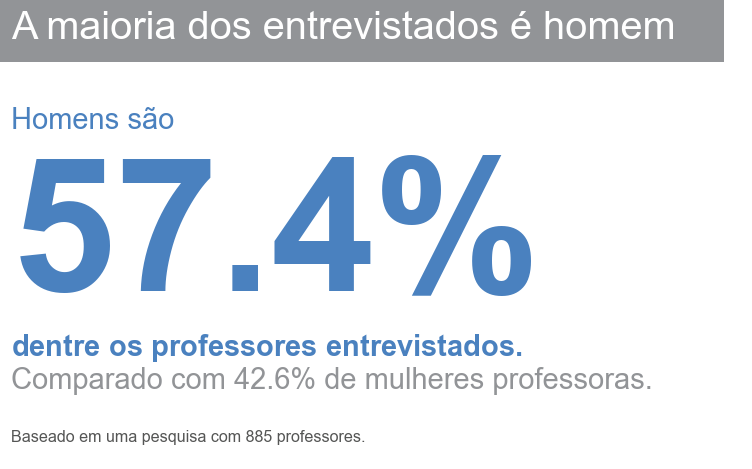

In [13]:
# finding out the male/female proportion
male_prof = round((len(professores[professores.GENDER == 0])/len(professores))*100,2)

# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines 
plt.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')

# titile the plot
plt.text(-0.15, 1.03,
         'A maioria dos entrevistados é homem '+' '*2,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7, 'pad': 10, 'edgecolor': 'none'})

# footnote with the data source
plt.text(-0.15, 0.04,
         'Baseado em uma pesquisa com 885 professores.',
         fontsize=10.5,
         color=GRAY3)

# add note to the plot
plt.text(-0.15, 0.81,
         'Homens são ',
         fontsize=19,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.41,
         '$\\bf{'+str(male_prof)+'\%}$', # use mathtext \\bf for bold text
         fontsize=122,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.25,
         # use mathtext \\bf for bold text
         '$\\bf{dentre\ os\ professores\ entrevistados.}$',
         fontsize=19,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.17,
         'Comparado com '+str(100-male_prof)+'% de mulheres professoras.',
         fontsize=19,
         color=GRAY7)

plt.axis('off');

Andiamo ora a visualizzare i bloxplot riferiti alle variabili continue, ovvero l'età e gli anni di esperienza già normalizzati per la stessa scala tra 0 e 1.

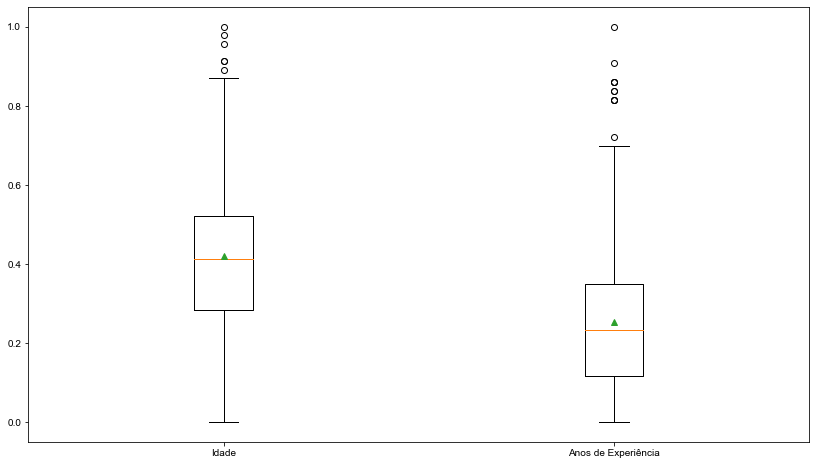

In [14]:
plt.subplots(figsize=(14,8))
plt.boxplot([professores_transform.AGE, professores_transform.YEARSEXP], 
            labels=['Idade', 'Anos de Experiência'], showmeans=True);

Come possiamo vedere, la media e la mediana delle età erano vicine allo 0,4 mentre la media e la mediana degli anni di esperienza erano inferiori allo 0,3. Di seguito verificheremo la distribuzione delle altre caratteristiche dei docenti intervistati.

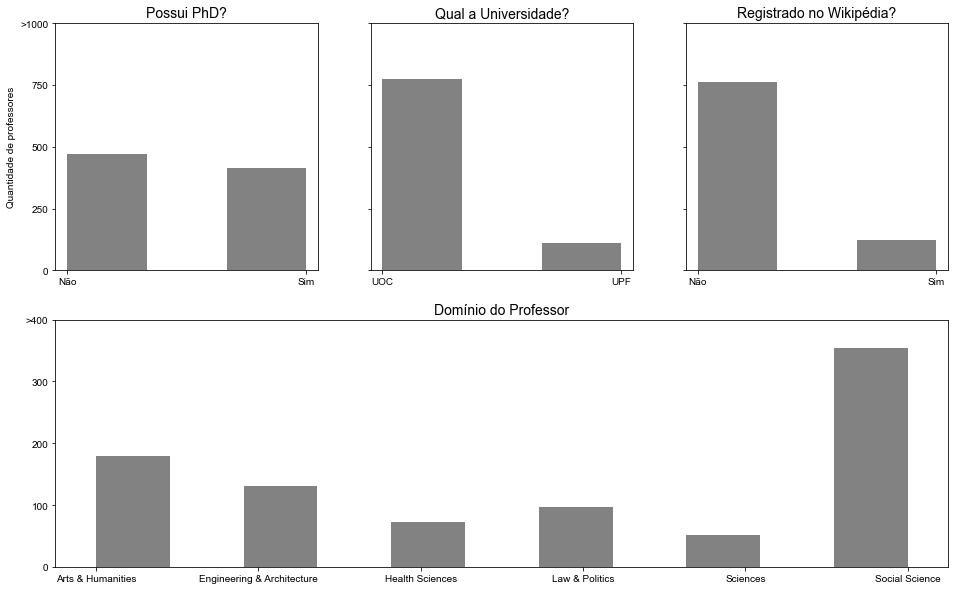

In [15]:
fig = plt.figure(figsize = (16,10));
        
ax = fig.add_subplot(2, 3, 1)
counts, bins, patches = ax.hist(professores['PhD'].map({0: 'Não', 1: 'Sim'}).sort_values(), bins = 3, color =GRAY6)
ax.set_title("Possui PhD?", fontsize = 14)
ax.set_ylabel("Quantidade de professores")
ax.set_ylim((0, 1000))
ax.set_yticks([0, 250, 500, 750, 1000])
ax.set_yticklabels([0, 250, 500, 750, ">1000"])

ax = fig.add_subplot(2, 3, 2)
ax.hist(professores['UNIVERSITY'].map({1.0: 'UOC', 2.0: 'UPF'}), bins = 3, color = GRAY6)
ax.set_title("Qual a Universidade?", fontsize = 14)
ax.set_ylim((0, 1000))
ax.set_yticks([0, 250, 500, 750, 1000])
ax.set_yticklabels([ "",  "",  "",  "", ""])

ax = fig.add_subplot(2, 3, 3)
ax.hist(professores['USERWIKI'].map({"0": 'Não', "1": 'Sim'}).sort_values(), bins = 3, color = GRAY6)
ax.set_title("Registrado no Wikipédia?", fontsize = 14)
ax.set_ylim((0, 1000))
ax.set_yticks([0, 250, 500, 750, 1000])
ax.set_yticklabels([ "",  "",  "",  "", ""]);

ax = fig.add_subplot(2, 1, 2)
ax.hist(professores['DOMAIN'].map({'1': "Arts & Humanities", '2':"Sciences", '3':"Health Sciences",
                                   '4':"Engineering & Architecture", '5':"Law & Politics", 
                                   '6':"Social Science"}).sort_values(), bins = 11, color = GRAY6)
ax.set_title("Domínio do Professor", fontsize = 14)
ax.set_ylim((0, 400))
ax.set_yticks([0, 100, 200, 300, 400])
ax.set_yticklabels([0, 100, 200, 300, ">400"]);

Come possiamo vedere nei grafici sopra, la maggior parte dei professori intervistati non ha PhD, proviene dall'università UOC e non è registrata su Wikipedia. La maggior parte di loro lavora nelle scienze sociali, artistiche e umanistiche.

In [16]:
perguntas.replace('?', np.nan, inplace=True)
print(perguntas.isnull().sum())
perguntas = perguntas.astype(float)
perguntas.fillna(value=6, inplace=True)

PU1       7
PU2      11
PU3       5
PEU1      4
PEU2     14
PEU3     97
ENJ1      7
ENJ2     17
Qu1       7
Qu2      10
Qu3      15
Qu4      22
Qu5      29
Vis1     72
Vis2    117
Vis3      8
Im1      22
Im2      20
Im3      57
SA1      11
SA2      12
SA3      11
Use1     14
Use2     17
Use3      9
Use4     23
Use5     15
Pf1      11
Pf2       6
Pf3      14
JR1      27
JR2      53
BI1      32
BI2      43
Inc1     35
Inc2     35
Inc3     37
Inc4     42
Exp1     13
Exp2     11
Exp3     13
Exp4     14
Exp5     13
dtype: int64


Esistono diversi modi per gestire i dati nulli nel set di dati della domanda. Un modo sarebbe trattare la scala likert come continua con valori compresi tra 1 e 5, quindi potremmo inserire la media di ogni domanda nei valori mancanti, come verrà fatto con i dati completi in seguito. Tuttavia, in questo modo non sarebbe possibile effettuare un'analisi sul motivo per cui i dati sono nulli in quelle domande. Pertanto, abbiamo scelto di includere una nuova categoria nelle domande (con il numero 6), per indicare i campi che erano nulli.

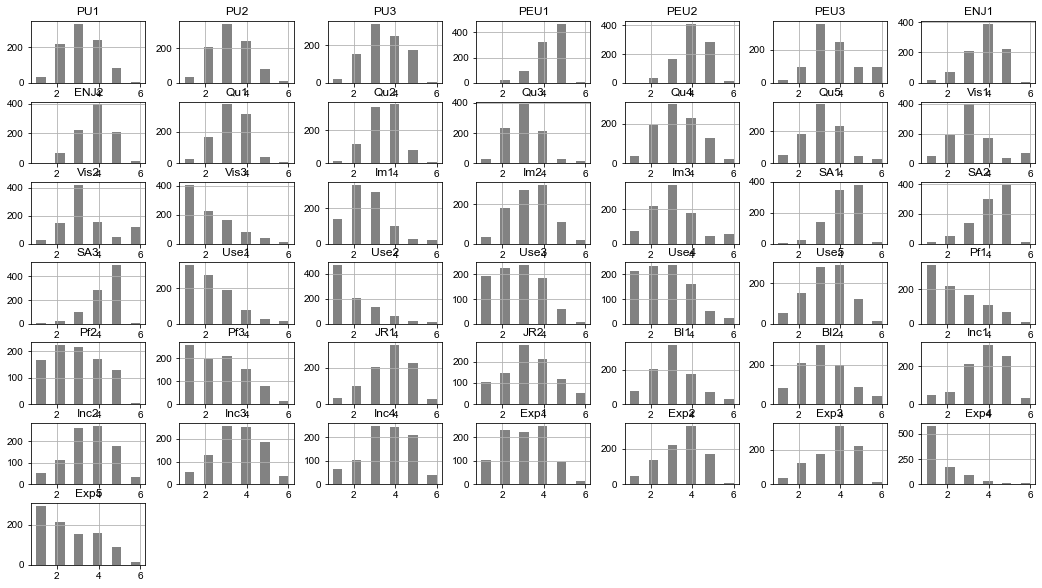

In [17]:
perguntas.hist(figsize=(18,10), color=GRAY6, bins=11);

Come possiamo vedere, la maggior parte delle domande ha una distribuzione quasi normale, con la maggior parte delle risposte concentrate tra 2, 3 e 4 (D'accordo, non sono né d'accordo né in disaccordo e non sono d'accordo). Tuttavia, ci sono alcune domande su cui la maggior parte delle risposte si è concentrata in forte disaccordo, come: Use1, Use2, Vis3 e Exp5. Questi casi si riferiscono all'uso di wikipedia per l'elaborazione di materiale e attività educative, la citazione di wikipedia in lavori accademici, l'uso di wikipedia per lavorare con gli studenti, tra gli altri.

Osservando l'ultima colonna dei grafici sopra, possiamo vedere la quantità di dati mancanti per ogni domanda. Si noti che PEU3, Vis1 e Vis2 hanno un numero maggiore di risposte mancanti, quando si analizzano rispettivamente queste domande, "È facile aggiungere o modificare informazioni su Wikipedia", "Wikipedia migliora la visibilità del lavoro degli studenti" e "È facile avere un registro dei contributi fatti su Wikipedia ". Puoi vedere che queste sono domande per gli utenti di wikipedia e la maggior parte degli insegnanti non è registrata sulla piattaforma, come visto in precedenza. Pertanto, è comprensibile che queste domande abbiano un maggior numero di domande senza risposta.

___

In [18]:
data = df.drop(columns=['UOC_POSITION', 'OTHER_POSITION', 'OTHERSTATUS'])
data.replace('?', np.nan, inplace=True)
data = data.dropna(subset=['DOMAIN', 'YEARSEXP', 'USERWIKI'])
data.head()

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,USERWIKI,PU1,PU2,PU3,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,0,4,4,3,...,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,0,2,3,3,...,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,0,2,2,2,...,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,0,3,3,4,...,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,1,4,3,5,...,5,5,5,4,4,5,5,5,4,4


In [19]:
data.iloc[:, 7:] = data.iloc[:, 7:].astype(float)
data = data.apply(lambda x: x.fillna(round(x.mean(), 0)),axis=0)

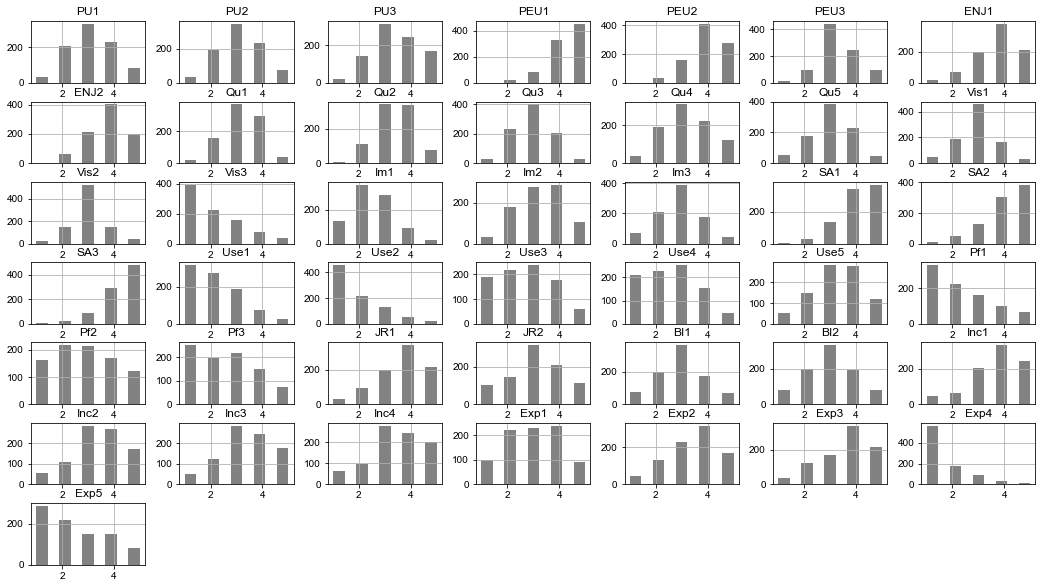

In [20]:
data.iloc[:, 7:].hist(figsize=(18,10), color=GRAY6, bins=9);

## Analisi delle domande che fanno riferimento a "Perceived Pleasure" su Wikipedia

Innanzitutto, controlliamo la distribuzione generale delle seguenti domande:

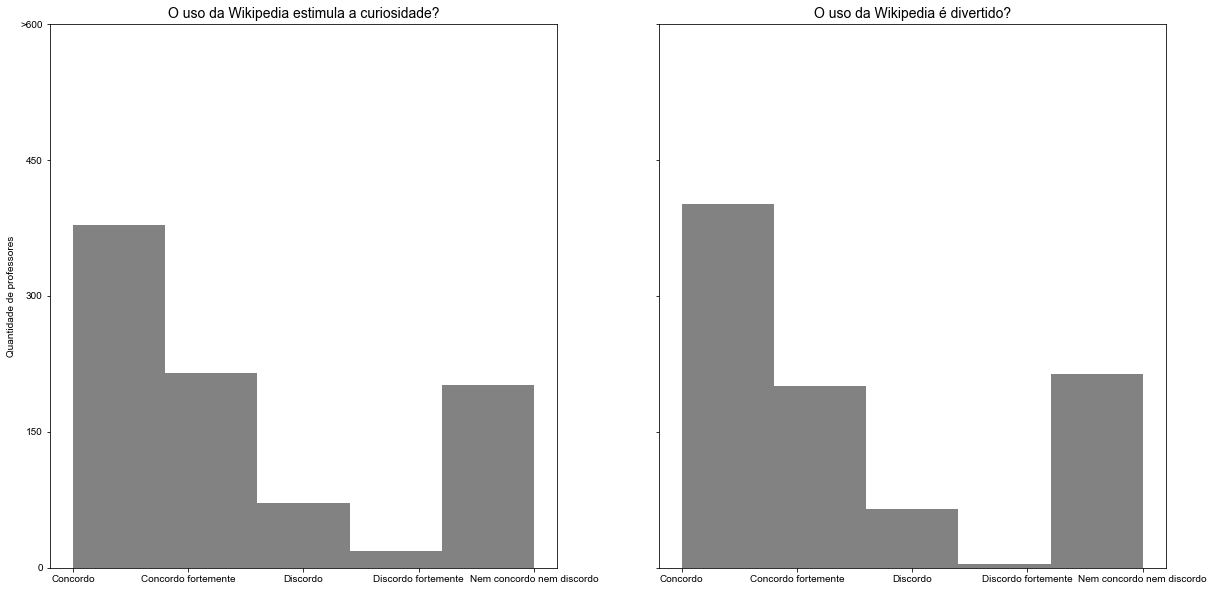

In [21]:
fig = plt.figure(figsize = (20,10));
        
ax = fig.add_subplot(1, 2, 1)
counts, bins, patches = ax.hist(data['ENJ1'].map({1.0: 'Discordo fortemente', 2.0: 'Discordo', 
                                                  3.0: 'Nem concordo nem discordo', 4.0: 'Concordo', 
                                                  5.0: 'Concordo fortemente'}).sort_values(), bins = 5, color =GRAY6)
ax.set_title("O uso da Wikipedia estimula a curiosidade?", fontsize = 14)
ax.set_ylabel("Quantidade de professores")
ax.set_ylim((0, 500))
ax.set_yticks([0, 150, 300, 450, 600])
ax.set_yticklabels([0, 150, 300, 450, ">600"])

ax = fig.add_subplot(1, 2, 2)
ax.hist(data['ENJ2'].map({1.0: 'Discordo fortemente', 2.0: 'Discordo', 
                          3.0: 'Nem concordo nem discordo', 4.0: 'Concordo', 
                          5.0: 'Concordo fortemente'}).sort_values(), bins = 5, color = GRAY6)
ax.set_title("O uso da Wikipedia é divertido?", fontsize = 14)
ax.set_ylim((0, 500))
ax.set_yticks([0, 150, 300, 450, 600])
ax.set_yticklabels([ "",  "",  "",  "", ""]);

Possiamo vedere qui che la maggior parte delle risposte era che erano d'accordo, seguita da né d'accordo né in disaccordo e fortemente d'accordo. Controlliamo ora se di queste risposte la maggioranza che è d'accordo è una donna o un uomo?

In [22]:
genero = data.groupby(['GENDER', 'ENJ1'])['ENJ1'].count()

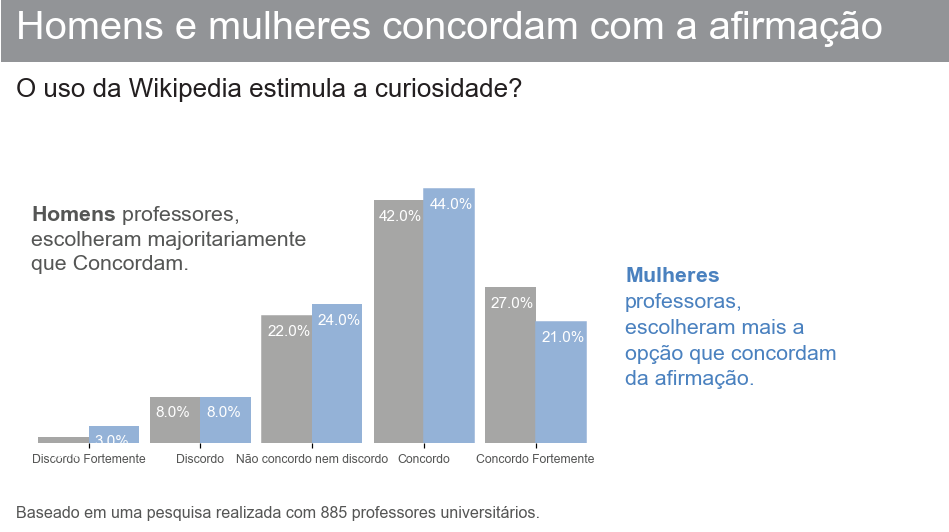

In [23]:
# survey responses
X = ['Discordo Fortemente', 'Discordo', 'Não concordo nem discordo', 'Concordo', 'Concordo Fortemente']
Y = list(round((genero[0]/len(data[data['GENDER'] == 0]))*100, 0))
Z = list(round((genero[1]/len(data[data['GENDER'] == 1]))*100, 0))

# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0, right=0.735, top=0.665, bottom=0.17)

# There is no automatic support of subcategories bar plot in matplotlib.
def subcategorybar(X,  # categories names
                   vals,  # subcategories values
                   base_colors,  # base colors for each subcategory
                   special_colors,  # highlight colors for subcategories
                   special_bars,  # highlighted bars indicies 
                   width=0.9):  # total subcategories bars width
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        # draw i-th subcategory bars
        bars = plt.bar(_X - width / 2. + i / float(n) * width,
                       vals[i],
                       width=width / float(n),
                       align="edge",  # aligns bars by their left edges
                       color=base_colors[i])  # use base color for subcategory

        # add numerical data labels for each bar
        for bi, b in enumerate(bars):
            plt.text(b.get_x() + 0.05, b.get_height() - 3.5,
                     str(vals[i][bi]) + '%',
                     fontsize=10,
                     color='white')
        # highlight bars
        if special_bars[i] != None:
            for special_bar_i in special_bars[i]:
                bars[special_bar_i].set_color(special_colors[i])
    # set category tick locations and labels of the x-axis
    plt.xticks(_X, X)


# draw subcategorical vertical bar plot
subcategorybar(X,  # responses
               [Y, Z],  # pre- and post- responses distribution
               [GRAY8, BLUE3],  # colors for pre- and post- bars
               [GRAY8, BLUE3],  # highlight colors for pre- and post- bars
               [[2], [3, 4]])  # highlight 3rd pre- and 4th,5th post- bar

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# configure responses labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(8)
    item.set_color(GRAY3)

# titile the plot
plt.text(-0.65, 70,
         'Homens e mulheres concordam com a afirmação' + ' ' * 5,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.65, 60, 'O uso da Wikipedia estimula a curiosidade?', fontsize=17, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.65, -13,
         'Baseado em uma pesquisa realizada com 885 '
         'professores universitários. ',
         fontsize=10.5,
         color=GRAY3)

# add pre- note to plot
plt.text(-0.52, 30,
         '$\\bf{Homens}$ professores,\n'  # use mathtext \\bf for bold text
         'escolheram majoritariamente\n'
         'que Concordam.',  # use mathtext
         fontsize=14,
         linespacing=1.3,  # multiple of font size
         color=GRAY3)

# add post- note to plot
plt.text(4.8, 10,
         '$\\bf{Mulheres}$\n'  # use mathtext \\b for bold text
         'professoras,\n'
         'escolheram mais a\n'
         'opção que concordam\n'  # use mathtext \\mathit for italic text
         'da afirmação.',
         fontsize=14,
         linespacing=1.45,  # multiple of font size
         color=BLUE2);

plt.tick_params(bottom='off', labelleft=False, left=False, grid_alpha=0)

Dal grafico sopra possiamo vedere che proporzionalmente un po 'più di donne non sono d'accordo o in disaccordo con gli uomini e il 44% delle donne concorda sul fatto che l'uso di wikipedia stimola la curiosità.

Vediamo ora come è stato il comportamento degli insegnanti per questa stessa domanda (L'uso di Wikipedia stimola la curiosità?) In relazione a chi ha un dottorato di ricerca e a chi no.

In [24]:
phd = data.groupby(['PhD', 'ENJ1'])['ENJ1'].count()

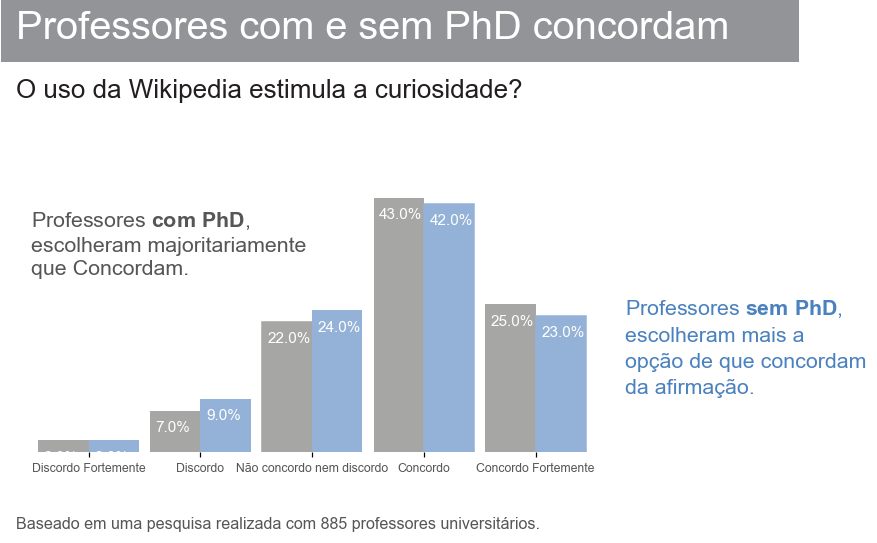

In [25]:
Y = list(round((phd[0]/len(data[data['PhD'] == 0]))*100, 0))
Z = list(round((phd[1]/len(data[data['PhD'] == 1]))*100, 0))

# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0, right=0.735, top=0.665, bottom=0.17)

# There is no automatic support of subcategories bar plot in matplotlib.
def subcategorybar(X,  # categories names
                   vals,  # subcategories values
                   base_colors,  # base colors for each subcategory
                   special_colors,  # highlight colors for subcategories
                   special_bars,  # highlighted bars indicies 
                   width=0.9):  # total subcategories bars width
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        # draw i-th subcategory bars
        bars = plt.bar(_X - width / 2. + i / float(n) * width,
                       vals[i],
                       width=width / float(n),
                       align="edge",  # aligns bars by their left edges
                       color=base_colors[i])  # use base color for subcategory

        # add numerical data labels for each bar
        for bi, b in enumerate(bars):
            plt.text(b.get_x() + 0.05, b.get_height() - 3.5,
                     str(vals[i][bi]) + '%',
                     fontsize=10,
                     color='white')
        # highlight bars
        if special_bars[i] != None:
            for special_bar_i in special_bars[i]:
                bars[special_bar_i].set_color(special_colors[i])
    # set category tick locations and labels of the x-axis
    plt.xticks(_X, X)


# draw subcategorical vertical bar plot
subcategorybar(X,  # responses
               [Y, Z],  # pre- and post- responses distribution
               [GRAY8, BLUE3],  # colors for pre- and post- bars
               [GRAY8, BLUE3],  # highlight colors for pre- and post- bars
               [[2], [3, 4]])  # highlight 3rd pre- and 4th,5th post- bar

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# configure responses labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(8)
    item.set_color(GRAY3)

# titile the plot
plt.text(-0.65, 70,
         'Professores com e sem PhD concordam' + ' ' * 5,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.65, 60, 'O uso da Wikipedia estimula a curiosidade?', fontsize=17, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.65, -13,
         'Baseado em uma pesquisa realizada com 885 '
         'professores universitários. ',
         fontsize=10.5,
         color=GRAY3)

# add pre- note to plot
plt.text(-0.52, 30,
         'Professores $\\bf{com\ PhD}$,\n'  # use mathtext \\bf for bold text
         'escolheram majoritariamente\n'
         'que Concordam.',  # use mathtext
         fontsize=14,
         linespacing=1.3,  # multiple of font size
         color=GRAY3)

# add post- note to plot
plt.text(4.8, 10,
         'Professores $\\bf{sem\ PhD}$,\n'
         'escolheram mais a\n'
         'opção de que concordam\n'  # use mathtext \\mathit for italic text
         'da afirmação.',
         fontsize=14,
         linespacing=1.45,  # multiple of font size
         color=BLUE2);

plt.tick_params(bottom='off', labelleft=False, left=False, grid_alpha=0)

Il grafico sopra mostra che i professori senza dottorato di ricerca sono in disaccordo e "né d'accordo né in disaccordo", proporzionalmente più dei professori con dottorato di ricerca Tuttavia, il 43% dei professori con dottorato è d'accordo e anche il 42% dei professori senza dottorato.

Verificheremo ora la proporzione in relazione agli insegnanti registrati su wikipedia.

In [26]:
data['USERWIKI'] = data['USERWIKI'].astype(int)
wiki = data.groupby(['USERWIKI', 'ENJ1'])['ENJ1'].count()

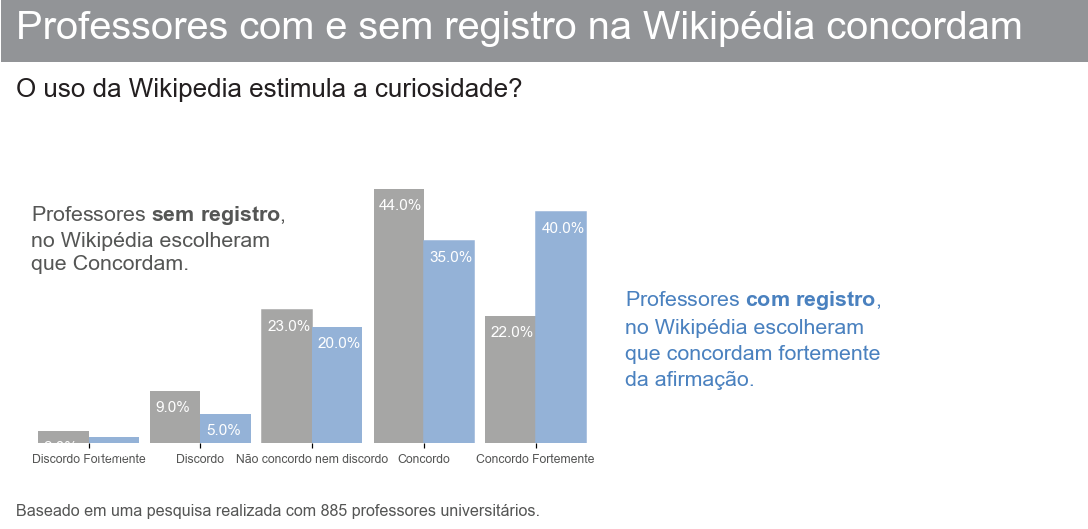

In [27]:
Y = list(round((wiki[0]/len(data[data['USERWIKI'] == 0]))*100, 0))
Z = list(round((wiki[1]/len(data[data['USERWIKI'] == 1]))*100, 0))

# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0, right=0.735, top=0.665, bottom=0.17)

# There is no automatic support of subcategories bar plot in matplotlib.
def subcategorybar(X,  # categories names
                   vals,  # subcategories values
                   base_colors,  # base colors for each subcategory
                   special_colors,  # highlight colors for subcategories
                   special_bars,  # highlighted bars indicies 
                   width=0.9):  # total subcategories bars width
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        # draw i-th subcategory bars
        bars = plt.bar(_X - width / 2. + i / float(n) * width,
                       vals[i],
                       width=width / float(n),
                       align="edge",  # aligns bars by their left edges
                       color=base_colors[i])  # use base color for subcategory

        # add numerical data labels for each bar
        for bi, b in enumerate(bars):
            plt.text(b.get_x() + 0.05, b.get_height() - 3.5,
                     str(vals[i][bi]) + '%',
                     fontsize=10,
                     color='white')
        # highlight bars
        if special_bars[i] != None:
            for special_bar_i in special_bars[i]:
                bars[special_bar_i].set_color(special_colors[i])
    # set category tick locations and labels of the x-axis
    plt.xticks(_X, X)


# draw subcategorical vertical bar plot
subcategorybar(X,  # responses
               [Y, Z],  # pre- and post- responses distribution
               [GRAY8, BLUE3],  # colors for pre- and post- bars
               [GRAY8, BLUE3],  # highlight colors for pre- and post- bars
               [[2], [3, 4]])  # highlight 3rd pre- and 4th,5th post- bar

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# configure responses labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(8)
    item.set_color(GRAY3)

# titile the plot
plt.text(-0.65, 70,
         'Professores com e sem registro na Wikipédia concordam' + ' ' * 5,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.65, 60, 'O uso da Wikipedia estimula a curiosidade?', fontsize=17, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.65, -12.5,
         'Baseado em uma pesquisa realizada com 885 '
         'professores universitários. ',
         fontsize=10.5,
         color=GRAY3)

# add pre- note to plot
plt.text(-0.52, 30,
         'Professores $\\bf{sem\ registro}$,\n'  # use mathtext \\bf for bold text
         'no Wikipédia escolheram \n'
         'que Concordam.',  # use mathtext
         fontsize=14,
         linespacing=1.3,  # multiple of font size
         color=GRAY3)

# add post- note to plot
plt.text(4.8, 10,
         'Professores $\\bf{com\ registro}$,\n'
         'no Wikipédia escolheram \n'
         'que concordam fortemente \n'
         'da afirmação.',
         fontsize=14,
         linespacing=1.45,  # multiple of font size
         color=BLUE2);

plt.tick_params(bottom='off', labelleft=False, left=False, grid_alpha=0)

Gli insegnanti registrati su Wikipedia sono fortemente d'accordo con l'affermazione (il 40% di loro), e gli insegnanti senza registrazione su Wikipedia tendono a rispondere più di quanto non siano in disaccordo e "né d'accordo né in disaccordo", così come sono d'accordo.

Verificheremo queste tre caratteristiche degli insegnanti, ma ora passiamo alla domanda "L'uso di Wikipedia è divertente?".

In [28]:
gender_2 = data.groupby(['GENDER', 'ENJ2'])['ENJ2'].count()

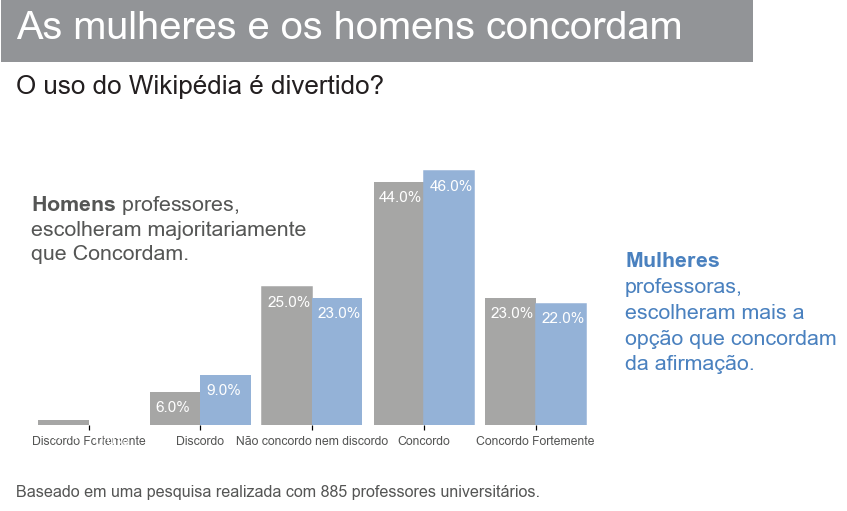

In [29]:
Z = [0.0]
Y = list(round((gender_2[0]/len(data[data['GENDER'] == 0]))*100, 0))
Z.extend(list(round((gender_2[1]/len(data[data['GENDER'] == 1]))*100, 0)))

# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0, right=0.735, top=0.665, bottom=0.17)

# There is no automatic support of subcategories bar plot in matplotlib.
def subcategorybar(X,  # categories names
                   vals,  # subcategories values
                   base_colors,  # base colors for each subcategory
                   special_colors,  # highlight colors for subcategories
                   special_bars,  # highlighted bars indicies 
                   width=0.9):  # total subcategories bars width
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        # draw i-th subcategory bars
        bars = plt.bar(_X - width / 2. + i / float(n) * width,
                       vals[i],
                       width=width / float(n),
                       align="edge",  # aligns bars by their left edges
                       color=base_colors[i])  # use base color for subcategory

        # add numerical data labels for each bar
        for bi, b in enumerate(bars):
            plt.text(b.get_x() + 0.05, b.get_height() - 3.5,
                     str(vals[i][bi]) + '%',
                     fontsize=10,
                     color='white')
        # highlight bars
        if special_bars[i] != None:
            for special_bar_i in special_bars[i]:
                bars[special_bar_i].set_color(special_colors[i])
    # set category tick locations and labels of the x-axis
    plt.xticks(_X, X)


# draw subcategorical vertical bar plot
subcategorybar(X,  # responses
               [Y, Z],  # pre- and post- responses distribution
               [GRAY8, BLUE3],  # colors for pre- and post- bars
               [GRAY8, BLUE3],  # highlight colors for pre- and post- bars
               [[2], [3, 4]])  # highlight 3rd pre- and 4th,5th post- bar

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# configure responses labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(8)
    item.set_color(GRAY3)

# titile the plot
plt.text(-0.65, 70,
         'As mulheres e os homens concordam' + ' ' * 5,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.65, 60, 'O uso do Wikipédia é divertido?', fontsize=17, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.65, -13,
         'Baseado em uma pesquisa realizada com 885 '
         'professores universitários. ',
         fontsize=10.5,
         color=GRAY3)

# add pre- note to plot
plt.text(-0.52, 30,
         '$\\bf{Homens}$ professores,\n'  # use mathtext \\bf for bold text
         'escolheram majoritariamente\n'
         'que Concordam.',  # use mathtext
         fontsize=14,
         linespacing=1.3,  # multiple of font size
         color=GRAY3)

# add post- note to plot
plt.text(4.8, 10,
         '$\\bf{Mulheres}$\n'  # use mathtext \\b for bold text
         'professoras,\n'
         'escolheram mais a\n'
         'opção que concordam\n'  # use mathtext \\mathit for italic text
         'da afirmação.',
         fontsize=14,
         linespacing=1.45,  # multiple of font size
         color=BLUE2);

plt.tick_params(bottom='off', labelleft=False, left=False, grid_alpha=0);

In proporzione, le donne sono ancora più d'accordo degli uomini (dal 46% al 44%).

In [30]:
phd_2 = data.groupby(['PhD', 'ENJ2'])['ENJ2'].count()

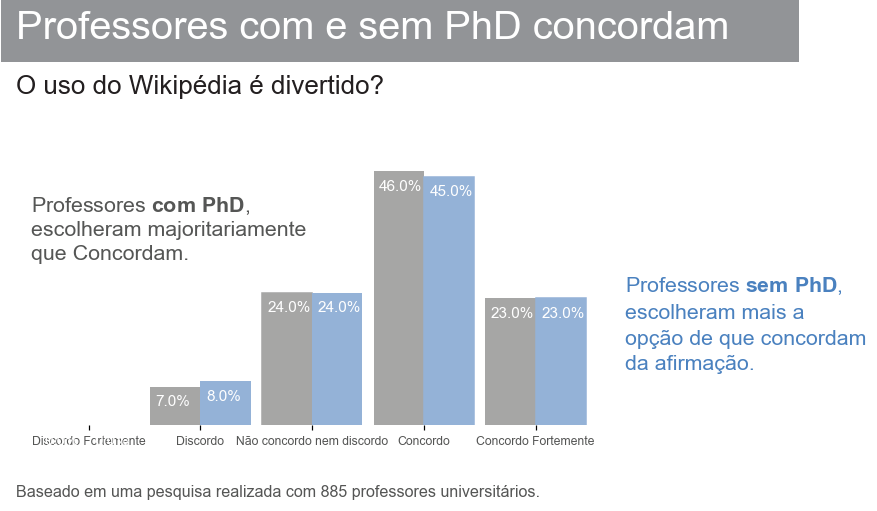

In [31]:
Y = list(round((phd_2[0]/len(data[data['PhD'] == 0]))*100, 0))
Z = list(round((phd_2[1]/len(data[data['PhD'] == 1]))*100, 0))

# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0, right=0.735, top=0.665, bottom=0.17)

# There is no automatic support of subcategories bar plot in matplotlib.
def subcategorybar(X,  # categories names
                   vals,  # subcategories values
                   base_colors,  # base colors for each subcategory
                   special_colors,  # highlight colors for subcategories
                   special_bars,  # highlighted bars indicies 
                   width=0.9):  # total subcategories bars width
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        # draw i-th subcategory bars
        bars = plt.bar(_X - width / 2. + i / float(n) * width,
                       vals[i],
                       width=width / float(n),
                       align="edge",  # aligns bars by their left edges
                       color=base_colors[i])  # use base color for subcategory

        # add numerical data labels for each bar
        for bi, b in enumerate(bars):
            plt.text(b.get_x() + 0.05, b.get_height() - 3.5,
                     str(vals[i][bi]) + '%',
                     fontsize=10,
                     color='white')
        # highlight bars
        if special_bars[i] != None:
            for special_bar_i in special_bars[i]:
                bars[special_bar_i].set_color(special_colors[i])
    # set category tick locations and labels of the x-axis
    plt.xticks(_X, X)


# draw subcategorical vertical bar plot
subcategorybar(X,  # responses
               [Y, Z],  # pre- and post- responses distribution
               [GRAY8, BLUE3],  # colors for pre- and post- bars
               [GRAY8, BLUE3],  # highlight colors for pre- and post- bars
               [[2], [3, 4]])  # highlight 3rd pre- and 4th,5th post- bar

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# configure responses labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(8)
    item.set_color(GRAY3)

# titile the plot
plt.text(-0.65, 70,
         'Professores com e sem PhD concordam' + ' ' * 5,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.65, 60, 'O uso do Wikipédia é divertido?', fontsize=17, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.65, -13,
         'Baseado em uma pesquisa realizada com 885 '
         'professores universitários. ',
         fontsize=10.5,
         color=GRAY3)

# add pre- note to plot
plt.text(-0.52, 30,
         'Professores $\\bf{com\ PhD}$,\n'  # use mathtext \\bf for bold text
         'escolheram majoritariamente\n'
         'que Concordam.',  # use mathtext
         fontsize=14,
         linespacing=1.3,  # multiple of font size
         color=GRAY3)

# add post- note to plot
plt.text(4.8, 10,
         'Professores $\\bf{sem\ PhD}$,\n'
         'escolheram mais a\n'
         'opção de que concordam\n'  # use mathtext \\mathit for italic text
         'da afirmação.',
         fontsize=14,
         linespacing=1.45,  # multiple of font size
         color=BLUE2);

plt.tick_params(bottom='off', labelleft=False, left=False, grid_alpha=0)

Praticamente il 45% degli insegnanti con e senza dottorato di ricerca concorda sul fatto che usare Wikipedia è divertente. Le altre opzioni erano ben bilanciate in relazione ai professori con e senza dottorato di ricerca.

In [32]:
wiki_2 = data.groupby(['USERWIKI', 'ENJ2'])['ENJ2'].count()

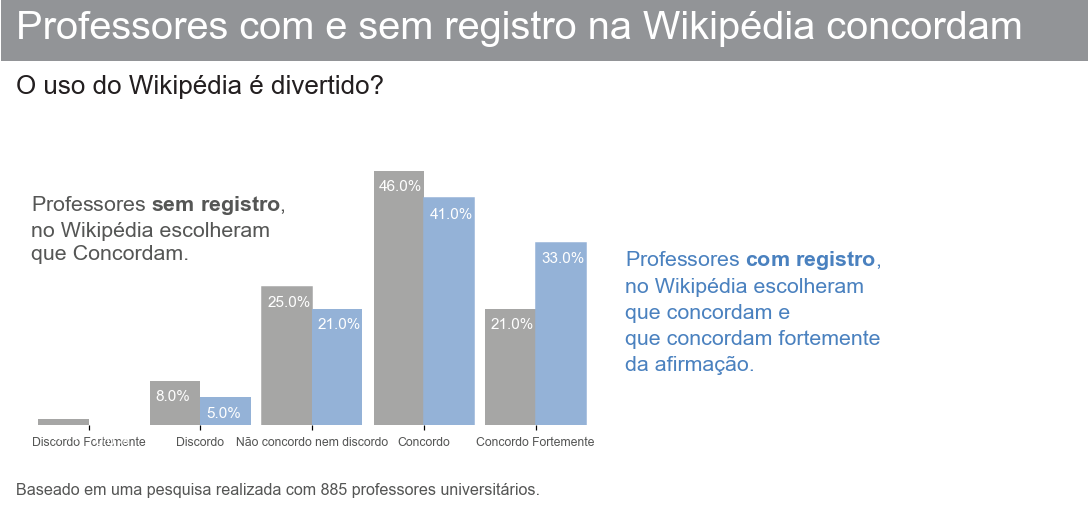

In [33]:
Z = [0.0]
Y = list(round((wiki_2[0]/len(data[data['USERWIKI'] == 0]))*100, 0))
Z.extend(list(round((wiki_2[1]/len(data[data['USERWIKI'] == 1]))*100, 0)))

# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0, right=0.735, top=0.665, bottom=0.17)

# There is no automatic support of subcategories bar plot in matplotlib.
def subcategorybar(X,  # categories names
                   vals,  # subcategories values
                   base_colors,  # base colors for each subcategory
                   special_colors,  # highlight colors for subcategories
                   special_bars,  # highlighted bars indicies 
                   width=0.9):  # total subcategories bars width
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        # draw i-th subcategory bars
        bars = plt.bar(_X - width / 2. + i / float(n) * width,
                       vals[i],
                       width=width / float(n),
                       align="edge",  # aligns bars by their left edges
                       color=base_colors[i])  # use base color for subcategory

        # add numerical data labels for each bar
        for bi, b in enumerate(bars):
            plt.text(b.get_x() + 0.05, b.get_height() - 3.5,
                     str(vals[i][bi]) + '%',
                     fontsize=10,
                     color='white')
        # highlight bars
        if special_bars[i] != None:
            for special_bar_i in special_bars[i]:
                bars[special_bar_i].set_color(special_colors[i])
    # set category tick locations and labels of the x-axis
    plt.xticks(_X, X)


# draw subcategorical vertical bar plot
subcategorybar(X,  # responses
               [Y, Z],  # pre- and post- responses distribution
               [GRAY8, BLUE3],  # colors for pre- and post- bars
               [GRAY8, BLUE3],  # highlight colors for pre- and post- bars
               [[2], [3, 4]])  # highlight 3rd pre- and 4th,5th post- bar

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# configure responses labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(8)
    item.set_color(GRAY3)

# titile the plot
plt.text(-0.65, 70,
         'Professores com e sem registro na Wikipédia concordam' + ' ' * 5,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.65, 60, 'O uso do Wikipédia é divertido?', fontsize=17, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.65, -12.5,
         'Baseado em uma pesquisa realizada com 885 '
         'professores universitários. ',
         fontsize=10.5,
         color=GRAY3)

# add pre- note to plot
plt.text(-0.52, 30,
         'Professores $\\bf{sem\ registro}$,\n'  # use mathtext \\bf for bold text
         'no Wikipédia escolheram \n'
         'que Concordam.',  # use mathtext
         fontsize=14,
         linespacing=1.3,  # multiple of font size
         color=GRAY3)

# add post- note to plot
plt.text(4.8, 10,
         'Professores $\\bf{com\ registro}$,\n'
         'no Wikipédia escolheram \n'
         'que concordam e \n'  # use mathtext \\mathit for italic text
         'que concordam fortemente \n'
         'da afirmação.',
         fontsize=14,
         linespacing=1.45,  # multiple of font size
         color=BLUE2);

plt.tick_params(bottom='off', labelleft=False, left=False, grid_alpha=0)

Infine, abbiamo che il 33% degli insegnanti registrati su Wikipedia crede che wikipedia sia divertente mentre quelli non registrati solo il 21% lo considera fortemente divertente. Tuttavia, entrambi (rispettivamente il 46% e il 41% degli insegnanti con e senza dottorato di ricerca) concordano con l'affermazione che wikipedia è divertente.

## Conclusão

Dopo aver eseguito questa prima analisi è possibile verificare che ci sono ancora diverse analisi che potrebbero essere eseguite su questi dati. Per cominciare potete eseguire un'analisi delle componenti principali, usando il clustering e controllando i cluster nei dati. Poi, sarebbe possibile eseguire un processo di apprendimento automatico supervisionato per prevedere se i nuovi insegnanti raccomanderebbero o meno wikipedia ai loro studenti.

In conclusione, è possibile vedere come gli insegnanti sentono wikipedia in diversi punti di vista attraverso questi dati. Tuttavia, vale la pena notare che sono stati intervistati i professori di due soli college, il che lascia i dati sbilanciati verso questa piccola nicchia. L'ideale sarebbe avere un campione più ampio, con più università partecipanti, che darebbe una visione più generale sull'argomento.

## Referências

* I dati utilizzati sono stati presi dal sito web: [UCI - Archivio di apprendimento automatico](https://archive.ics.uci.edu/ml/datasets/wiki4HE#)
* I grafici sono stati basati sui grafici del libro Storytelling with Data - Knaflic e sul codice ottenuto [da questo github](https://github.com/empathy87/storytelling-with-data).